<a href="https://colab.research.google.com/github/mariemouertani104/Automatic-Modulation-Classification-using-Deep-Learning-5G-Oriented-Study-/blob/main/Automatic_Modulation_Classification_(AMC)_par_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating dataset...
Dataset shape : (4000, 128, 2)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 126, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 28, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 14, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3584)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       917,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,292 (3.98 MB)

 Trainable params: 1,043,396 (3.98 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.4292 - loss: 2.1566 - val_accuracy: 0.5297 - val_loss: 1.0597
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.6885 - loss: 0.7034 - val_accuracy: 0.5219 - val_loss: 1.0346
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.8062 - loss: 0.5237 - val_accuracy: 0.4516 - val_loss: 1.2128
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9165 - loss: 0.3051 - val_accuracy: 0.3844 - val_loss: 1.2730
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.9732 - loss: 0.1497 - val_accuracy: 0.2562 - val_loss: 1.8340
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9863 - loss: 0.0699 - val_accuracy: 0.2594 - val_loss: 2.3392
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9939 - loss: 0.0377 - val_accuracy: 0.3266 - val_loss: 2.9062
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9964 - loss: 0.0216 - val_accuracy: 0.

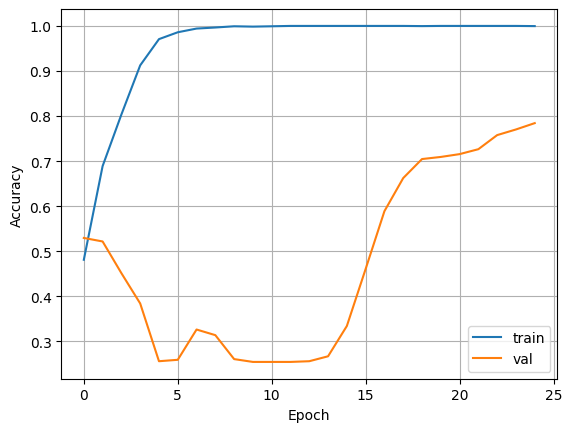

SNR = -5 dB : accuracy = 0.251
SNR = 0 dB : accuracy = 0.257
SNR = 5 dB : accuracy = 0.563
SNR = 10 dB : accuracy = 0.787
SNR = 15 dB : accuracy = 0.827
SNR = 20 dB : accuracy = 0.843


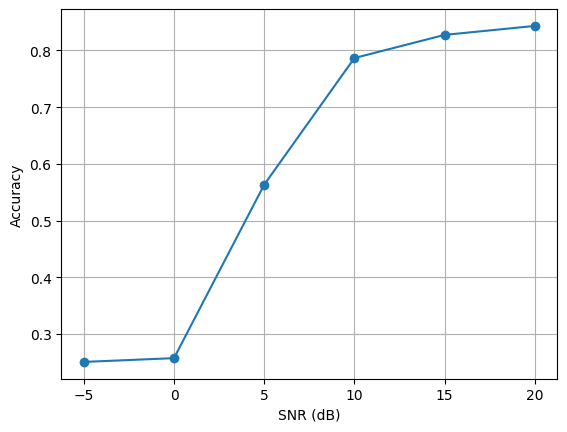

In [1]:
# ============================================================
# Automatic Modulation Classification using CNN
# Academic – clean – reproducible – Colab ready
# ============================================================

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Parameters
# ------------------------------------------------------------

MODS = ["BPSK", "QPSK", "8PSK", "16QAM"]
N_SAMPLES = 1000      # number of signals per modulation
SEQ_LEN = 128         # IQ samples per signal
SNR_DB = 10           # training SNR

# ------------------------------------------------------------
# Utility functions
# ------------------------------------------------------------

def add_awgn(signal, snr_db):
    snr = 10**(snr_db/10)
    power = np.mean(np.abs(signal)**2)
    noise_power = power / snr
    noise = np.sqrt(noise_power/2) * (
        np.random.randn(*signal.shape) +
        1j*np.random.randn(*signal.shape)
    )
    return signal + noise


# ------------------------------------------------------------
# Modulation generators
# ------------------------------------------------------------

def generate_bpsk(n):
    bits = np.random.randint(0, 2, n)
    return 2*bits - 1

def generate_qpsk(n):
    bits = np.random.randint(0, 4, n)
    mapping = {
        0: 1+1j,
        1: -1+1j,
        2: -1-1j,
        3: 1-1j
    }
    return np.array([mapping[b] for b in bits]) / np.sqrt(2)

def generate_8psk(n):
    k = np.random.randint(0, 8, n)
    return np.exp(1j*2*np.pi*k/8)

def generate_16qam(n):
    re = np.random.choice([-3,-1,1,3], n)
    im = np.random.choice([-3,-1,1,3], n)
    return (re + 1j*im)/np.sqrt(10)


def generate_signal(mod, n):
    if mod == "BPSK":
        s = generate_bpsk(n).astype(np.complex64)
    elif mod == "QPSK":
        s = generate_qpsk(n)
    elif mod == "8PSK":
        s = generate_8psk(n)
    elif mod == "16QAM":
        s = generate_16qam(n)
    else:
        raise ValueError
    return s


# ------------------------------------------------------------
# Dataset generation
# ------------------------------------------------------------

def build_dataset():

    X = []
    y = []

    for label, mod in enumerate(MODS):
        for _ in range(N_SAMPLES):

            sig = generate_signal(mod, SEQ_LEN)
            sig = add_awgn(sig, SNR_DB)

            sig = sig / np.sqrt(np.mean(np.abs(sig)**2))

            sample = np.stack([np.real(sig), np.imag(sig)], axis=1)

            X.append(sample)
            y.append(label)

    X = np.array(X, dtype=np.float32)
    y = np.array(y)

    return X, y


print("Generating dataset...")
X, y = build_dataset()

print("Dataset shape :", X.shape)

# ------------------------------------------------------------
# Train / Test split
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------------------
# CNN model
# ------------------------------------------------------------

model = models.Sequential([
    layers.Input(shape=(SEQ_LEN, 2)),

    layers.Conv1D(64, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),

    layers.Conv1D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),

    layers.Conv1D(256, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(len(MODS), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ------------------------------------------------------------
# Training
# ------------------------------------------------------------

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=128
)

# ------------------------------------------------------------
# Evaluation
# ------------------------------------------------------------

loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy :", acc)

# ------------------------------------------------------------
# Accuracy curve
# ------------------------------------------------------------

plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# ------------------------------------------------------------
# Test on different SNR values
# ------------------------------------------------------------

def test_snr(model, snr_db):

    Xsnr = []
    ysnr = []

    for label, mod in enumerate(MODS):
        for _ in range(300):

            sig = generate_signal(mod, SEQ_LEN)
            sig = add_awgn(sig, snr_db)
            sig = sig / np.sqrt(np.mean(np.abs(sig)**2))

            sample = np.stack([np.real(sig), np.imag(sig)], axis=1)

            Xsnr.append(sample)
            ysnr.append(label)

    Xsnr = np.array(Xsnr, dtype=np.float32)
    ysnr = np.array(ysnr)

    _, acc = model.evaluate(Xsnr, ysnr, verbose=0)
    return acc


snrs = [-5, 0, 5, 10, 15, 20]
accs = []

for s in snrs:
    a = test_snr(model, s)
    accs.append(a)
    print(f"SNR = {s} dB : accuracy = {a:.3f}")

plt.plot(snrs, accs, marker='o')
plt.xlabel("SNR (dB)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
